# Day 1-13.07.2020

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({'W':[62,58,70,75,92,55,90,97],'HD':[0,0,0,1,1,0,1,1]})

In [3]:
df.head()

,W,HD
0,62,0
1,58,0
2,70,0
3,75,1
4,92,1


In [4]:
X = df['W']
y = df['HD']

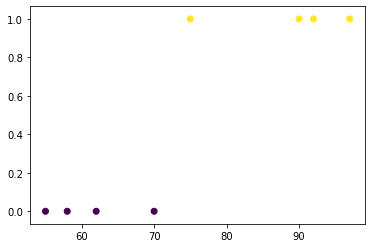

In [5]:
plt.scatter(X,y,c = y)

In [6]:
b1= np.sum((X-X.mean())*(y-y.mean())) / np.sum(((X-X.mean())**2))


In [7]:
b1

0.028975875589818567

In [8]:
b0 = y.mean()-b1*X.mean()
b0

-1.6695686847876652

In [9]:
yreg = b1*X + b0
yreg

0    0.126936
1    0.011032
2    0.358743
3    0.503622
4    0.996212
5   -0.075896
6    0.938260
7    1.141091
Name: W, dtype: float64

In [10]:
P = np.exp(yreg)/(1+np.exp(yreg))  #exponential only gives positive values
P

0    0.531691
1    0.502758
2    0.588736
3    0.623310
4    0.730313
5    0.481035
6    0.718748
7    0.757880
Name: W, dtype: float64

In [11]:
#Threshold
c = P.copy()
threshold = P.mean()
threshold  

0.6168089847214485

In [12]:
c[c>=threshold] = 1
c[c<=threshold] = 0
c

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
Name: W, dtype: float64

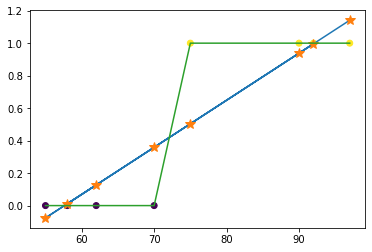

In [13]:
plt.scatter(X,y,c = y)
plt.plot(X,yreg)
plt.plot(X,yreg,'*',markersize = 10)
plt.plot(np.sort(X),np.sort(c))

P = exp(yreg) / (1+exp(yreg)) = 1 / (1+exp(-yreg))

P/(1-P) = exp(yreg)

ln(P/(1-P)) = yreg = b1*x+b0 ...>Logit function = log(odds)

one unit increase in b1 will increase/decrese the odd of getting hear disease by exp(b1) by keeping other input constant

In [14]:
P

0    0.531691
1    0.502758
2    0.588736
3    0.623310
4    0.730313
5    0.481035
6    0.718748
7    0.757880
Name: W, dtype: float64

In [15]:
#Likelihood in Logistic Regression
y1 = pd.concat([y,P],1)
y1

,HD,W
0,0,0.531691
1,0,0.502758
2,0,0.588736
3,1,0.623310
4,1,0.730313
5,0,0.481035
6,1,0.718748
7,1,0.757880


In [16]:
lh= (1-0.531)*(1-0.502)*(1-0.588)*0.623*0.730*(1-0.481)*(0.718)*(0.757)
lh

0.012345196012130591

In [17]:
llh = np.log(1-0.531)+np.log(1-0.502)+np.log(1-0.588)+np.log(0.623)+np.log(0.730)+np.log(1-0.481)+np.log(0.718)+np.log(0.757)
llh

-4.394488278455187

# log likelihood = yi*log(pi) + (1-yi)*log(1-pi)

In [18]:
#for the first observation 0*log(0.53) + (1-0)*log(1-0.53)

# US Heart Patient Dataset

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.shape

(4240, 16)

In [10]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [12]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
df = df.drop('education',1)

In [14]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
df.isna().sum()*100/4240

male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [16]:
df1 = df.dropna()

In [17]:
df.shape

(4240, 15)

In [18]:
df1.shape

(3751, 15)

In [19]:
(4240-3751)/4240  #11% data removed from data

0.11533018867924529

In [20]:
df1.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Checking Multicollinearity Assumptions
In Logistic regression we only need to check multicollinearity

In [21]:
import seaborn as sns

In [22]:
y = df1['TenYearCHD']
X = df1.drop('TenYearCHD',axis = 1)

In [23]:
X.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.024142,0.203215,0.325886,-0.052355,-0.002513,0.003588,0.011834,-0.067595,-0.044515,0.053890,0.074868,-0.115444,0.003130
age,-0.024142,1.000000,-0.211338,-0.188804,0.131690,0.050018,0.305292,0.109321,0.261443,0.388280,0.205191,0.136428,-0.005893,0.118529
currentSmoker,0.203215,-0.211338,1.000000,0.773259,-0.051816,-0.037573,-0.105258,-0.045308,-0.049945,-0.133154,-0.114118,-0.165404,0.054924,-0.054078
cigsPerDay,0.325886,-0.188804,0.773259,1.000000,-0.046625,-0.035713,-0.067470,-0.039436,-0.030600,-0.092310,-0.056202,-0.090525,0.067194,-0.055090
BPMeds,-0.052355,0.131690,-0.051816,-0.046625,1.000000,0.111601,0.262955,0.056337,0.089625,0.269479,0.199282,0.105128,0.010228,0.052464
prevalentStroke,-0.002513,0.050018,-0.037573,-0.035713,0.111601,1.000000,0.065169,0.009423,0.012297,0.060421,0.055189,0.035568,-0.016673,0.015789
prevalentHyp,0.003588,0.305292,-0.105258,-0.067470,0.262955,0.065169,1.000000,0.082030,0.164645,0.697849,0.616753,0.303411,0.142013,0.085776
diabetes,0.011834,0.109321,-0.045308,-0.039436,0.056337,0.009423,0.082030,1.000000,0.047453,0.104393,0.051761,0.093098,0.063370,0.616087
totChol,-0.067595,0.261443,-0.049945,-0.030600,0.089625,0.012297,0.164645,0.047453,1.000000,0.216375,0.169811,0.119651,0.094795,0.046902
sysBP,-0.044515,0.388280,-0.133154,-0.092310,0.269479,0.060421,0.697849,0.104393,0.216375,1.000000,0.785853,0.330484,0.181381,0.132878


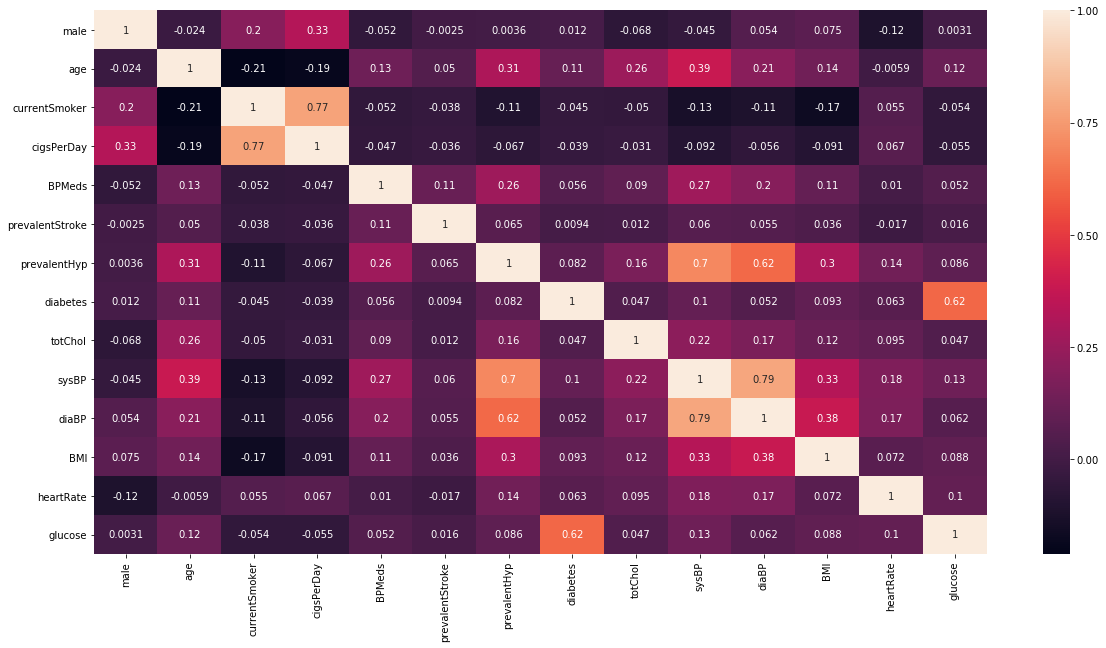

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot = True)

In [25]:
#Standardizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc,columns=X.columns)
X_sc.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.116292,-1.233910,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,-0.939971,-1.196195,-1.084431,0.285780,0.359347,-0.204365
1,-0.895823,-0.417017,-0.977069,-0.755527,-0.177044,-0.075034,-0.673285,-0.167191,0.293057,-0.515725,-0.162478,0.718738,1.614075,-0.246242
2,1.116292,-0.183620,1.023469,0.921832,-0.177044,-0.075034,-0.673285,-0.167191,0.180963,-0.220855,-0.246291,-0.115199,-0.058895,-0.497509
3,-0.895823,1.333466,1.023469,1.760511,-0.177044,-0.075034,1.485255,-0.167191,-0.267411,0.799850,1.010918,0.681838,-0.895380,0.884456
4,-0.895823,-0.417017,1.023469,1.173436,-0.177044,-0.075034,-0.673285,-0.167191,1.077711,-0.107443,0.088964,-0.666236,0.777590,0.130657


In [26]:
#vif analysis
vif=pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF']=[variance_inflation_factor(X_sc.values,i) for i in range(X_sc.shape[1])]
vif['Feature']=X_sc.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
9,3.748616,sysBP
10,2.978558,diaBP
3,2.717855,cigsPerDay
2,2.581445,currentSmoker
6,2.050417,prevalentHyp
13,1.641197,glucose
7,1.620306,diabetes
1,1.339169,age
11,1.224244,BMI
0,1.201620,male


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=48,stratify = y)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score

In [33]:
cm = confusion_matrix(y_pred,y_test) 
cm                                          #944-TN

array([[944, 159],
       [ 10,  13]], dtype=int64)

In [59]:
y_test = pd.DataFrame(y_test)
y_test['TenYearCHD'].value_counts()  #here 954 = -ve, 172 = +ve

#TN = 944
#TP = 13
#FN = 159
#FP = 10

0    954
1    172
Name: TenYearCHD, dtype: int64

In [60]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [61]:
Acc= (TP+TN)/(TP+TN+FP+FN)
Acc

0.849911190053286

In [62]:
Recall=TP/(TP+FN)
Recall*100

56.52173913043478

In [63]:
Precision=TP/(TP+FP)
Precision*100

7.55813953488372

In [67]:
recall_score(y_test,y_pred)

0.0755813953488372

In [68]:
precision_score(y_test,y_pred)

0.5652173913043478

In [71]:
f1_score(y_test,y_pred)

0.1333333333333333

This is a example

100- patients 95 - actually not having cancer 5 - having cancer

my algo predicted 95 non cancer cases correctly as non cancer and predicted 2 out of 5 correctly as cancer

TP = 2
TN = 95
FP = 0
FN = 3

In [72]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1103
           1       0.08      0.57      0.13        23

    accuracy                           0.85      1126
   macro avg       0.53      0.71      0.53      1126
weighted avg       0.97      0.85      0.90      1126



Senthil@greatlearning.in


# Day 2-14.07.2020

In [41]:
prob=logmodel.predict_proba(X_test)
prob                                   #here column 0 = Class0
                                       #here column 1 = Class 1

array([[0.73144606, 0.26855394],
       [0.78657455, 0.21342545],
       [0.7884863 , 0.2115137 ],
       ...,
       [0.84967259, 0.15032741],
       [0.86483817, 0.13516183],
       [0.96072427, 0.03927573]])

*We are plotting ROC curve with respect to class 1*

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score

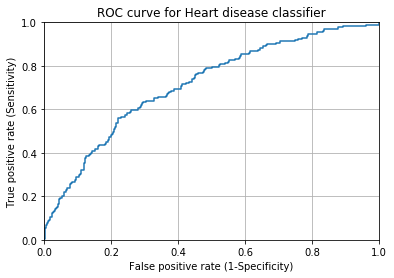

In [46]:
prob_1=prob[:,1]                         #taking the class 1 probability
                               
fpr,tpr,threshold=roc_curve(y_test,prob_1)   #in roc curve we have to give one class probability
                                             #roc needs fpr,tpr and threshold
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [48]:
#score for roc and auc
roc_auc_score(y_test,prob_1)

0.7133306518453513

## Model Tuning with respect to threshold values

y_pred = Is having class values of 0 and 1 for a threshold of 0.5 given by my sklearn model

y_pred1 = New predcited values for diiferent threshold values

In [50]:
import numpy as np
y_pred1=np.zeros([len(y_test),1])   #dummy zero array of the size of my test set

In [51]:
y_pred1[prob_1>=0.4] = 1    #probability of 1 st class  if it is greater than and equal to 0.4 then we are changing it to 1.
                        # and probability of 0 class if it is less than 0.4 then its automatically 0 we dont have to write it.

As it is a medical domain Recall is our metrics so Recall for class 1 improved from 0.57 to 0.43

F1 score also improved from 0.13 to 0.20 which is 7% increase

In [52]:
print(classification_report(y_pred1,y_test))  #now

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      1073
         1.0       0.13      0.43      0.20        53

    accuracy                           0.84      1126
   macro avg       0.55      0.65      0.56      1126
weighted avg       0.93      0.84      0.88      1126



In [73]:
print(classification_report(y_pred,y_test))  #earlier

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1103
           1       0.08      0.57      0.13        23

    accuracy                           0.85      1126
   macro avg       0.53      0.71      0.53      1126
weighted avg       0.97      0.85      0.90      1126



In [54]:
#Checking threshold values in a loop instead of 0.4
for i in [0.2,0.3,0.4,0.5,0.6,0.8]:
    y_pred1=np.zeros([len(y_test),1])
    y_pred1[prob_1>=i]=1
    print("The report for Threshold = ",i)
    print(confusion_matrix(y_test,y_pred1))
    print(classification_report(y_test,y_pred1))

The report for Threshold =  0.2
[[751 203]
 [ 83  89]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       954
           1       0.30      0.52      0.38       172

    accuracy                           0.75      1126
   macro avg       0.60      0.65      0.61      1126
weighted avg       0.81      0.75      0.77      1126

The report for Threshold =  0.3
[[859  95]
 [122  50]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       954
           1       0.34      0.29      0.32       172

    accuracy                           0.81      1126
   macro avg       0.61      0.60      0.60      1126
weighted avg       0.79      0.81      0.80      1126

The report for Threshold =  0.4
[[924  30]
 [149  23]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       954
           1       0.43      0.13      0.20       172

    accuracy     

Here threshold = 0.2 is best as f1 score for class 1 prob is 0.38

Lowering the threshold, FP will increase,Precision Decrease

Both F1 score and auc will increase/descrease

## Model Tuning with Sampling Strategy

SMOTE will increase the minority sample by considering the n number of neighbors and it will identify the direction of each and every neighbors. In that direction/path it will randomly introduce the sample.We have to take atleast 5 neighbors so distribution will create in a radial way.

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [78]:
y.value_counts()
#y.value_counts(normalize = True)                       #y is original data,its an imbalanced data

0    3179
1     572
Name: TenYearCHD, dtype: int64

In [79]:
X_sc.shape,y.shape

((3751, 14), (3751,))

In [82]:
#Performing SMOTE
sm = SMOTE(k_neighbors=5,random_state = 100)
X_bal,y_bal = sm.fit_resample(X_sc,y)

In [83]:
y_bal.value_counts()  #now a balanced dataset...we did oversampling/up-sampling

1    3179
0    3179
Name: TenYearCHD, dtype: int64

In [84]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_bal,y_bal,test_size=0.3,
                                                                     random_state=48, stratify=y_bal)

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_pred_smote = model.predict(X_test_smote)

In [86]:
print(classification_report(y_test_smote,y_pred_smote))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       954
           1       0.68      0.71      0.70       954

    accuracy                           0.69      1908
   macro avg       0.69      0.69      0.69      1908
weighted avg       0.69      0.69      0.69      1908



Note- Its not necessary to make 572 samples to 3179, just 1500 samples would also do. Then it wont be a a imbalanced dataset.

## Pipeline(SMOTE+NearMiss)

In [87]:
count_class_0 = 2000
count_class_1 = 2000             #count class values can be increased/decreased
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
#sm = SMOTE(sampling_strategy={0:7963,1:5000}, k_neighbors=k, random_state=seed)
X_bal, y_bal = pipe.fit_resample(X_sc, y)

We dont want to oversampling/undersmapling in such a way that 572 gets increased to 3179, rather than we increase to 2000,data will automatically a balanced dataset.

In [88]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_bal,y_bal,test_size=0.3,
                                                                     random_state=48, stratify=y_bal)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_pred_smote = model.predict(X_test_smote)

In [89]:
print(classification_report(y_test_smote,y_pred_smote))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       600
           1       0.69      0.66      0.68       600

    accuracy                           0.69      1200
   macro avg       0.69      0.69      0.69      1200
weighted avg       0.69      0.69      0.69      1200



# Day 3-15.07.2020

# Logistic Regression model through Statistics

As logistic regression is a linear model the pvalue technique using statistics will work here.It wont work for other classification model.

In [90]:
import statsmodels.api as sm

In [91]:
X_c = sm.add_constant(X)
X_c

C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1.0,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,1.0,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1.0,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [93]:
model_stats = sm.Logit(y,X_c)
result = model_stats.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:                  0.1170
Time:                        22:34:18   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
male                0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

1.Pseudo R-squ.: 0.1170

2.Pseudo R2 - btw 0.2 and 0.4 is considered as a good model

3.Our Logistic Regression model is producing performance better than your null model by 11.7%

4.Null model - a model build with only intercept value. In Linear Reg its called mean model.

5.LLR p-value- Its same as F-Statistics in Linear Regression.It will whether overall model is significant or not.
               Should be less than 0.05 .Here model is significant as LLR value is 0.

We can see from the above summary that 8 features pvalue is greater than 0.05 so we will do backward elimination and eliminate all the features greater than 0.05

All the variables are given as input and eventually we remove the features one by one which is not creating an impact to the model.
Performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature

In [94]:
#Performing backward elimination
while(len(X.columns)>0):
    X_c=sm.add_constant(X)
    model_stats = sm.Logit(y,X_c)
    result = model_stats.fit()   #creating andd fitting Logitic Regression model
    f=result.pvalues[1:].idxmax()#which features are having maximum p-values.
    if result.pvalues[1:].max()>0.05:
        X=X.drop(f,1)
    else:
        break
print('The final features trough backward eliminations are :',X.columns)

C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377105
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377161
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377221
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377593
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377958
         Iterations 7
The final features trough backward eliminations are : Index(['male', 'age', 'cigsP

Final set of variables after Backward Elimination are:-'male', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'

In [96]:
result.summary()           #all pvalues greater than 0.05 removed one by one through backward elimination

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:                  0.1149
Time:                        23:12:16   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
male           0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

### Infering the Model

In [97]:
report = np.exp(result.params)
report=pd.DataFrame(report)
report   #odd of male getting heart disease is 78 % more than female
        # if you increase the age by 1 unit , the odd of getting the HD will increase by 6.7%

,0
const,0.000109
male,1.788687
age,1.067644
cigsPerDay,1.019897
totChol,1.002273
sysBP,1.017529
glucose,1.007617


 - **This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (Gen_male = 1)over that of  females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.**
<br>
<br>

 - **The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.**
<br>
<br>
 - **Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.** 
<br>
<br>
 - **For Total cholosterol level and glucose level there is no significant change.**
<br>
<br>
 - **There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.**

# Day 4-16.7.2020

# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('DT.xlsx')
df.head()

,Past Trend,Open Interest,Trading Volume,Return
0,Positive,Low,High,Up
1,Negative,High,Low,Down
2,Positive,Low,High,Up
3,Positive,High,High,Up
4,Negative,Low,High,Down


In [5]:
df_dum = pd.get_dummies(df,drop_first=True)
df_dum.head()

,Past Trend_Positive,Open Interest_Low,Trading Volume_Low,Return_Up
0,1,1,0,1
1,0,0,1,0
2,1,1,0,1
3,1,0,0,1
4,0,1,0,0


In [6]:
df_dum.columns = df.columns
df_dum

,Past Trend,Open Interest,Trading Volume,Return
0,1,1,0,1
1,0,0,1,0
2,1,1,0,1
3,1,0,0,1
4,0,1,0,0
5,1,1,1,0
6,0,0,0,0
7,0,1,0,0
8,1,1,1,0
9,1,0,0,1


In [8]:
y = df_dum['Return']
X = df_dum.drop('Return',axis = 1)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [15]:
y_pred = dt.predict(X)

In [12]:
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

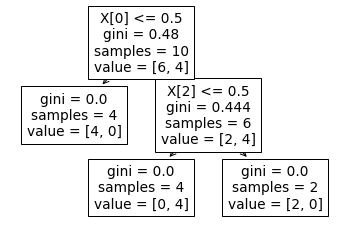

In [16]:
tree.plot_tree(dt)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/balance_data.csv')
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
df['Class Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [4]:
df['Class Name'] = df['Class Name'].replace({'B':0,'R':1,'L':2})
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,0,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5


In [5]:
y = df['Class Name']
X = df.drop('Class Name',1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48,stratify = y)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred1 = dt.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.84      0.87      0.85        84
           2       0.87      0.87      0.87        86

    accuracy                           0.79       188
   macro avg       0.57      0.58      0.58       188
weighted avg       0.77      0.79      0.78       188



We can see that 0 class f1score is zero.It means an imbalanced dataset.So applying SMOTE.

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
y.value_counts()   #imbalanced dataset

2    288
1    288
0     49
Name: Class Name, dtype: int64

In [16]:
#Performing SMOTE
sm = SMOTE(k_neighbors=5,random_state = 48)
X_bal,y_bal = sm.fit_resample(X,y)

In [17]:
y_bal.value_counts()

2    288
1    288
0    288
Name: Class Name, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.30, random_state=48,stratify = y_bal)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred1 = dt.predict(X_test)

print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       110
           1       0.77      0.93      0.84        72
           2       0.80      0.88      0.84        78

    accuracy                           0.83       260
   macro avg       0.83      0.85      0.84       260
weighted avg       0.85      0.83      0.83       260



## Cross val score
- Cross val score doesnt reduce the overfit
- it tells us about overfit nature of our model

In [19]:
#Applying cross_val_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,make_scorer

In [20]:
kfold = KFold(n_splits = 5,shuffle = True)
scorer = make_scorer(f1_score,average = 'weighted') #if we want to give normal average give'macro' 
score = cross_val_score(dt,X_bal,y_bal,cv = kfold,scoring=scorer) 

#cv = 5 means it will split data into 5 groups and first group to test and remaining to train.
#in the second iteration,second group will be used for test and remaining 4 groups to train.
#we will get 5 ouputs from cv. 5 times it will run the dt.


#here accuracy is default scoring method,but we mentioned f1score
#for multiclass classification we have to create scorer separately. In binary we can directly give it.

In [21]:
np.mean(score)  #overall model performance is nothing but average of all 5 datasegment model performance

0.8428438693703335

- 70:30 split accuracy = 0.83
- cross val score accuracy = 0.84
- My 70:30 score is almost same as cross val score,so no overfit.

### Whether it is overfitting or not,we can find bias error and variance error

In [22]:
bias_err = 1-np.mean(score)
bias_err

0.1571561306296665

In [23]:
var_err = np.var(score)
var_err

0.0009797349098977746

- Variance of the score-How much variation btw each score of 5 output produced by cross val score
- Variance should be as minimum as possible

In [24]:
std_err = np.std(score)
std_err

0.03130071740228608

- Whenever we want to check our model is overfitiing or not,do the cross_val_score and take the average values of all that score, and take the Standard deviation value of all the score.
- If the Std Dev. is high,the model is overfitting
- If the Std Dec. is very close to zero,model is not overfitting.

- Assume if the model was overfitting,we can do pre-pruning
- 1.Max_depth
- 2.Minimum sample leaf
- 3.Sample split.

## Tuning model using for loop(without using hyperparameter)
Normal hyperparameter takes time,so this is a alternative method

In [25]:
kfold=KFold(n_splits=5,random_state=48,shuffle=True)
for i in [5,8,10,12,14,16,18,20,40]:
    #for j in [10,15,20,30]:
    dt=DecisionTreeClassifier(max_depth=i,min_samples_split=4,random_state=48)  #why random state = 48 in dt?
    scorer = make_scorer(f1_score, average = 'weighted')
    score=cross_val_score(dt,X_bal,y_bal,cv=kfold,scoring=scorer)
    print('max_depth:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score))

max_depth: 5
Bias Error 0.33600382746790824
Variance Error 0.10080634318159824
max_depth: 8
Bias Error 0.1959646326923853
Variance Error 0.04010380695644111
max_depth: 10
Bias Error 0.18302866133053397
Variance Error 0.03312244121466178
max_depth: 12
Bias Error 0.18280582186626704
Variance Error 0.029291388210370792
max_depth: 14
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 16
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 18
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 20
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054
max_depth: 40
Bias Error 0.18282209100190394
Variance Error 0.02931751707065054


- j is for minimum sample split.
- We want our DT to give result according to the above 3 parameter and nothing else
- Reduce variance error as much as possible
- Low bias and low variance gives us the best model
- We have too check for which max_depth ,bias is low and variance is also low
- Variance error is most important in industry. We have to low it as possible

In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40, min_samples_split=4, random_state=48)

In [27]:
#feature importance
dt.feature_importances_  

#for all the parent node what is the reduction in gini

array([0.29275814, 0.23054982, 0.32177965, 0.15491239])

- Higher the value,higher is the importance of the variable
- Here Right weight(0.321) is the most imp feature

In [ ]:
#problem in feature importance to explain your model?
- 

In [55]:
#pip install treeinterpreter

Note: you may need to restart the kernel to use updated packages.


In [28]:
from treeinterpreter import treeinterpreter as ti

C:\Users\Avish\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
obser = X.loc[110].values.reshape(1,-1)
obser

#1,5,3,1 is the values of the 4 feature for 1/10 index observation

array([[1, 5, 3, 1]], dtype=int64)

In [32]:
predictions,bias,contribution = ti.predict(dt,obser)

In [33]:
predictions  #class 1,class2 and class 3

array([[0., 0., 1.]])

In [34]:
contribution   #class 1(first matrix), #class2(secondmatrix) #class3(third matrix)

#each column has 4 values because we have 4 features

array([[[ 0.42719207,  0.04601714, -0.47320921],
        [-0.36801932, -0.06231884,  0.43033816],
        [-0.45871795,  0.03974359,  0.41897436],
        [ 0.06676374, -0.35622334,  0.2894596 ]]])